<a href="https://colab.research.google.com/github/osum97/python_create_app_1/blob/master/%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [실습-정답] Python 활용한 AI 모델링 - 전처리 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 전처리에 대해 실습해 보겠습니다.
+ 머신러닝과 AI 모델링 전체에서 60~70% 차지하는 부분이 바로 전처리 파트입니다.
+ 굉장히 시간과 노력이 많이 투입되며, 어려운 부분일수 있습니다.
+ 데이터가 깨끗이 정리되지 않는다면 머신러닝/AI 성능을 장담할수 없으므로 데이터 전처리에 심혈을 기울려 주시기 바랍니다.
+ 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다.
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
0. 실습 내용 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 불필요 컬럼 삭제
 - 컬럼 내용 변경하기
 - 컬럼 type 변경하기
 - 결측치 처리
 - 그룹화
4. 시각화
5. 결과 저장하기

##  
# 0. 실습 내용 확인

## <font color=blue> **머신러닝, 딥러닝을 사용한 통신 서비스 이탈 예측** </font>
### 모든 관련 고객 데이터를 분석하고 강력하고 정확한 이탈 예측 모델을 개발하여 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 수립합니다.
### Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미합니다. 모든 조직이 기존 고객을 유지하고 새로운 고객을 유치하는 것이 매우 중요합니다. 그 중 하나가 실패하면 비즈니스에 좋지 않습니다. 목표는 업계에서 경쟁 우위를 유지하기 위해 이탈 예측을 위한 머신러닝, 딥러닝의 가능성을 탐색하는 것입니다.

#  
# 1. 필요 라이브러리 임포트 및 파일 읽어오기

### Numpy

##### <font color=blue> **[문제] numpy 라이브러리를 np alias로 임포트하세요.** </font>

In [ ]:
import numpy as np





####  
### Pandas

##### <font color=blue> **[문제] pandas 라이브러리를 pd alias로 임포트하세요.** </font>

In [ ]:
import pandas as pd





####  
### 읽어올 데이터 파일 : <font color=blue>cust_info.csv, service_info.csv</font>

#### Telco Customer Churn Dataset  

* **cust_info.csv**
    - CustomerID: Customer ID unique for each customer
    - gender: Whether the customer is a male or a female
    - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부
    - Partner: Whether the customer has a partner or not (Yes, No)
    - Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부<br><br>

* **service_info.csv**
    - CustomerID: Customer ID unique for each customer
    - Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수
    - PhoneService: Whether the customer has a phone service or not (Yes, No)
    - MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
    - InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
    - OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
    - OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
    - DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
    - TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
    - StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
    - StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
    - Contract: The contract term of the customer (Month-to-month, One year, Two years)
    - PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
    - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    - MonthlyCharges: The amount charged to the customer monthly
    - TotalCharges: The total amount charged to the customer
    - Churn: Whether the customer churned or not (Yes or No) : 이탈 여부

####  
### 2개의 CSV 파일 데이터 읽고 합치기

##### <font color=blue> **[문제] 아래 가이드에 따라서 df 데이터프레임 변수를 만드세요.** </font>
1. cust_info.csv 파일을 판다스 read_csv() 함수를 이용하여 읽고 cust_info 데이터프레임 변수에 저장하세요.
2. service_info.csv 파일을 판다스 read_csv() 함수를 이용하여 읽고 service_info 데이터프레임 변수에 저장하세요.
3. 2개의 데이터프레임을 merge 함수를 활용해서 합쳐 df 데이터프레임에 저장하세요.

In [ ]:
# 첫번째, 읽어 들일 파일명 : cust_info.csv
# Pandas read_csv 함수 활용
# 결과 : cust_info 데이터프레임 저장


cust_info = pd.read_csv('cust_info.csv')

In [ ]:
# cust_info 데이터프레임 확인하기
cust_info

,customerID,gender,SeniorCitizen,Partner,Dependents
0,1090-PYKCI,Female,0.0,Yes,Yes
1,5835-BEQEU,Male,0.0,No,No
2,9943-VSZUV,Male,1.0,No,No
3,7130-CTCUS,Male,1.0,Yes,No
4,6968-URWQU,Male,0.0,Yes,No
...,...,...,...,...,...
7038,8714-CTZJW,Female,0.0,No,No
7039,0071-NDAFP,Male,0.0,Yes,Yes
7040,7055-HNEOJ,Male,0.0,Yes,No
7041,5949-EBSQK,Male,0.0,Yes,Yes


In [ ]:
# 두번째, 읽어 들일 파일명 : service_info.csv
# Pandas read_csv 함수 활용
# 결과 : service_info 데이터프레임 저장


service_info = pd.read_csv('service_info.csv')

In [ ]:
# service_info 데이터프레임 확인하기
service_info

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,No phone service,DSL,No,Yes,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,No,DSL,Yes,Yes,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,No phone service,DSL,Yes,No,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,No,Fiber optic,No,No,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# 세번째, 2개의 데이터프레임 (cust_info, service_info)를
# pandas merege() 함수 활용
# df 데이터프레임 저장


df = pd.merge(cust_info, service_info, on='customerID')

In [ ]:
# df 데이터프레임 확인하기
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1090-PYKCI,Female,0.0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),105.10,7234.8,No
1,5835-BEQEU,Male,0.0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.95,228.4,Yes
2,9943-VSZUV,Male,1.0,No,No,67,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.70,5060.85,No
3,7130-CTCUS,Male,1.0,Yes,No,16,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.55,825.1,No
4,6968-URWQU,Male,0.0,Yes,No,43,Yes,No,DSL,No,...,NaN,No,Yes,No,One year,Yes,Mailed check,56.35,2391.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,8714-CTZJW,Female,0.0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),82.85,319.6,No
7039,0071-NDAFP,Male,0.0,Yes,Yes,25,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.50,630.6,No
7040,7055-HNEOJ,Male,0.0,Yes,No,3,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,55.80,154.55,No
7041,5949-EBSQK,Male,0.0,Yes,Yes,4,Yes,No,DSL,No,...,NaN,Yes,No,Yes,Month-to-month,No,Credit card (automatic),61.45,229.55,Yes


#  
# 2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석

### 데이터 탐색하기

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1090-PYKCI,Female,0.0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),105.10,7234.8,No
1,5835-BEQEU,Male,0.0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.95,228.4,Yes
2,9943-VSZUV,Male,1.0,No,No,67,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.70,5060.85,No
3,7130-CTCUS,Male,1.0,Yes,No,16,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.55,825.1,No
4,6968-URWQU,Male,0.0,Yes,No,43,Yes,No,DSL,No,...,NaN,No,Yes,No,One year,Yes,Mailed check,56.35,2391.15,No


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,8714-CTZJW,Female,0.0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),82.85,319.6,No
7039,0071-NDAFP,Male,0.0,Yes,Yes,25,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.50,630.6,No
7040,7055-HNEOJ,Male,0.0,Yes,No,3,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,55.80,154.55,No
7041,5949-EBSQK,Male,0.0,Yes,Yes,4,Yes,No,DSL,No,...,NaN,Yes,No,Yes,Month-to-month,No,Credit card (automatic),61.45,229.55,Yes
7042,3683-QKIUE,Female,0.0,No,No,6,Yes,No,DSL,No,...,NaN,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),50.80,288.05,Yes


####  
### 자료구조 파악

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####  
### 데이터 타입, 인덱스, 컬럼명, Values 확인

In [ ]:
# 인덱스
df.index

RangeIndex(start=0, stop=7043, step=1)

In [ ]:
# 컬럼명
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Values
df.values

array([['1090-PYKCI', 'Female', 0.0, ..., 105.1, '7234.8', 'No'],
       ['5835-BEQEU', 'Male', 0.0, ..., 76.95, '228.4', 'Yes'],
       ['9943-VSZUV', 'Male', 1.0, ..., 75.7, '5060.85', 'No'],
       ...,
       ['7055-HNEOJ', 'Male', 0.0, ..., 55.8, '154.55', 'No'],
       ['5949-EBSQK', 'Male', 0.0, ..., 61.45, '229.55', 'Yes'],
       ['3683-QKIUE', 'Female', 0.0, ..., 50.8, '288.05', 'Yes']],
      dtype=object)

####  
### Null 데이터 확인

In [ ]:
df.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

####  
### 통계 정보

In [ ]:
# SeniorCitizen 컬럼 : 고령자 여부, 범주형 0,1
# tenure : 서비스 사용한 월수로 평균 32개월 사용, 최대 72개월 충성고객 있음 확인
#           25%, 50%, 75% 비율과 Max를 보니, 아무래도 Outliner 있는것으로 사료됨.
# MonthlyCharges : 월사용요금, 평균 64$ , 최소 18$, 최대 118$

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#  
# 3. 데이터 전처리 수행

####  
### 자료구조 파악

##### <font color=blue> **[문제] df DataFrame의 함수를 활용해서 자료구조(Row, columnm , Not-null, type)을 파악 하세요.** </font>

In [ ]:
# DataFrame info 함수



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####  
### 컬럼 삭제

##### <font color=blue> **[문제] df 데이터프레임에서 'customerID' 컬럼 삭제 하세요.** </font>

In [ ]:
# DataFrame drop 함수
# 'customerID' 컬럼 삭제
# axis=1 옵션 사용해서 컬럼단위 삭제 수행
# inplace=True 옵션 사용하여 df DataFrame에 저장


df.drop('customerID', axis=1, inplace=True)

In [ ]:
# 21컬럼에서 20개 컬럼으로 1개 줄어듬 확인
# TotalCharges 컬럼은 사용요금으로 숫자형이어야 하는데 Ojbect로 나옴. 확인 필요

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7034 non-null   object 
 1   SeniorCitizen     7042 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7041 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7040 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  3580 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7042 non-null   object 


####  
### 컬럼 내용 변경하기

범주형 문자 데이터를 숫자 변환하는것은 성능에 많은 영향을 미치므로 꼭 변환하로록 하자.<br>
null, _ 문제있는 문자 데이터를 모델링하기 전에 미리 다른 데이터로 변경하거나 필요없을 경우 삭제하도록 하자.

#### TotalCharges 컬럼 타입 변경하기

In [ ]:
# TotalCharges : 월사용요금, 실수형으로 보인다.
df['TotalCharges']

0        7234.8
1         228.4
2       5060.85
3         825.1
4       2391.15
         ...   
7038      319.6
7039      630.6
7040     154.55
7041     229.55
7042     288.05
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
# TotalCharges 컬럼 타입을 float로 변경해 보자.
# 문자열을 숫자형으로 변경할수 없으므로 에러 발생

df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [ ]:
# TotalCharges 컬럼 값들중에 ' ' 공백 있는지 확인해 보자
# Boolean indexing으로 검색
# Boolean indexing에서 2개 이상의 조건을 연결시 AND : & , OR : |  구분하여 사용해 줘야 한다.

(df['TotalCharges'] == '') | (df['TotalCharges'] == ' ')

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
# Boolean indexing으로 검색

cond = (df['TotalCharges'] == '') | (df['TotalCharges'] == ' ')
df[cond]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
367,Female,0.0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,NaN,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
388,Male,0.0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
502,Male,0.0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
1016,Female,0.0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1466,Female,0.0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3036,Female,0.0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3508,Male,0.0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,NaN,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4275,Male,0.0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,NaN,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
4728,Female,0.0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
5152,Male,0.0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,NaN,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No


####  
##### <font color=blue> **[문제] df 데이터프레임의 'TotalCharges' 컬럼의 값 ' ' --> '0' 변경하세요.** </font>

In [ ]:
# DataFrame replace 함수
# 대상 컬럼 : 'TotalCharges'



df['TotalCharges'].replace([' '], ['0'], inplace=True)

####  
##### <font color=blue> **[문제] df 데이터프레임의 'TotalCharges' 컬럼 타입을 object에서 float 변경하세요.** </font>

In [ ]:
# 'TotalCharges' 컬럼 type을 float로 변경
# 결과를 TotalCharges 컬럼에 다시 넣어야 합니다.



df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
# 다시 Boolean indexing으로 검색 : '' 값을 가진 Row 없음

cond = (df['TotalCharges'] == '') | (df['TotalCharges'] == ' ')
df[cond]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
# TotalCharges 컬럼 float 변경 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7034 non-null   object 
 1   SeniorCitizen     7042 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7041 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7040 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  3580 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7042 non-null   object 


#### Churn 컬럼의 문자열값을 숫자로 변경

In [ ]:
# Churn 컬럼의 분포 확인
# Churn Yes : 이탈 , No : 이탈안함. 언밸런스하게 No쪽이 많은 차지하고 있음

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
# 'Churn' 컬럼의 ['Yes', 'No'] --> [1, 0] 변경하기
# 컴퓨터는 문자열 이해 잘 하지 못해 숫자로 변경해야 함.

df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
# Churn 컬럼의 분포 확인
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

####  
### Null 데이터 확인

##### <font color=blue> **[문제] df 데이터프레임에 대해 컬럼별로 null 얼마나 있는지 null 갯수를 나열 하세요.** </font>

In [ ]:
# DataFrame isnull(), sum() 함수 활용



df.isnull().sum()

gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

####  
### 결측치 처리

데이터에 결측치 있으면 모델링시 알지 못하는 에러 발생할수 있으므로 반드시 결측치를 제거나 변경해야 한다.<br>
결측치 처리시 dropna(), fillna() 함수 활용하면 된다.<br>
결측치를 변경시 변경하는 방법이 꼭 정답이 아니며, 여러가지 판단하고 고민이 필요하다.<br>
주로, 문자형 컬럼에 대해 최빈값으로 , 숫자형 컬럼에 대해 중간값으로 결측치 대신해서 채울수 있다.

####  
##### <font color=blue> **[문제] df 데이터프레임의 결측치를 아래 가이드에 따라 처리하세요.** </font>
- 결측치 많은 DeviceProtection 컬럼 제거
- Dependents 컬럼의 결측치 : 최빈값 채우기
- MonthlyCharges 컬럼의 결측치 : 평균값 채우기
- 나머지 결측치 제거

In [ ]:
# 1. 결측치 많은 DeviceProtection 컬럼 제거  --> drop 함수 활용
# 2. Dependents 컬럼의 결측치 : 최빈값 채우기  --> fillna 함수, mode 함수 활용
# 3. MonthlyCharges 컬럼의 결측치 : 평균값 채우기  --> fillna 함수, mean 함수 활용
# 4. 나머지 결측치 제거 : dropna 함수 활용


df.drop( 'DeviceProtection', axis=1, inplace=True)
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].mode() )
df['MonthlyCharges'] =  df['MonthlyCharges'].fillna( df['MonthlyCharges'].mean() )
df.dropna(inplace=True)

In [ ]:
# Null 여부 다시 확인
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# DeviceProtection 컬럼 삭제 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7028 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7028 non-null   object 
 1   SeniorCitizen     7028 non-null   float64
 2   Partner           7028 non-null   object 
 3   Dependents        7028 non-null   object 
 4   tenure            7028 non-null   int64  
 5   PhoneService      7028 non-null   object 
 6   MultipleLines     7028 non-null   object 
 7   InternetService   7028 non-null   object 
 8   OnlineSecurity    7028 non-null   object 
 9   OnlineBackup      7028 non-null   object 
 10  TechSupport       7028 non-null   object 
 11  StreamingTV       7028 non-null   object 
 12  StreamingMovies   7028 non-null   object 
 13  Contract          7028 non-null   object 
 14  PaperlessBilling  7028 non-null   object 
 15  PaymentMethod     7028 non-null   object 
 16  MonthlyCharges    7028 non-null   float64
 17  

####  
### 그룹화

- 데이터를 그룹화하고 그룹화된 데이터에 대한 연산을 수행하는 기능으로

- 그룹화를 사용하면 데이터를 더 쉽게 분석할수 있으며 컬럼간의 분포나 차이를 확인할수 있습니다.


##### <font color=blue> **[문제] df 데이터프레임에서 숫자형 컬럼을 뽑아 'Churn' 컬럼을 기준으로 그룹화하고 각 컬럼의 평균을 출력 하세요.** </font>

In [ ]:
# 1. 숫자형 컬럼 추출하기 : select_dtypes() 함수 활용,
# 옵션으로 'number' 혹은 ['int', 'float']

df.select_dtypes(['int', 'float']).head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0.0,69,105.10,7234.80,0
1,0.0,3,76.95,228.40,1
2,1.0,67,75.70,5060.85,0
3,1.0,16,54.55,825.10,0
4,0.0,43,56.35,2391.15,0


In [ ]:
# 2. df 데이터프레임에서 숫자형 추출하고 'Churn' 컬럼을 기준으로 그룹화 및 평균 출력하기
# Churn : 0 이탈X, 1 이탈
# tenure 기준으로 보면 이탈하지 않은 고객보다 이탈한 고객의 서비스 사용 개월수가 적다.
# MonthlyCharges 기준으로 보면 이탈하지 않은 고객보다 이탈한 고객의 월사용료가 더 크다.


df.select_dtypes(['int', 'float']).groupby(['Churn']).mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
0,0.129020,37.582720,61.285841,2550.905434
1,0.255091,17.994105,74.439068,1533.128912


##### <font color=blue> **[문제] 아래 가이드에 따라 그룹화 하세요.** </font>
- 대상 컬럼 : 'gender' , 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'
- Churn + gender 그룹화하여 각 평균 출력

In [ ]:
# 'gender' , 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn' 컬럼을 대상으로
# Churn + gender 그룹화 및 평균 출력
# 이탈하지 않은 남녀는 비슷하게 총요금을 사용하고 있으나,
# 이탈하는 고객중에서 남자가 여자보다 총요금을 더 사용하고 있습니다.


df[ ['gender' , 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] ].groupby([ 'Churn' , 'gender' ]).mean()

tenure  MonthlyCharges  TotalCharges
Churn gender                                         
0     Female  37.879921       61.689311   2591.055236
      Male    37.294813       60.894990   2512.011270
1     Female  17.013874       74.802935   1441.879136
      Male    18.982777       74.072067   1625.164478

#  
# 4. 시각화

### 라이브러리 임포트

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

####  
### Bar 차트

In [ ]:
df['gender'].value_counts()

gender
Male      3551
Female    3477
Name: count, dtype: int64

<Axes: xlabel='gender'>

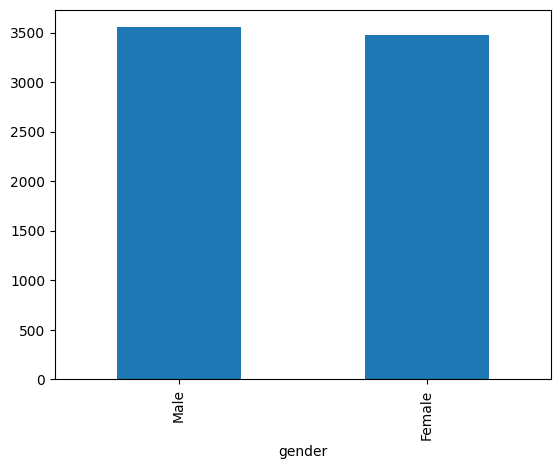

In [ ]:
df['gender'].value_counts().plot(kind='bar')

##### <font color=blue> **[문제] df 데이터프레임의 'Partner' 컬럼의 값 분포를 구하고 Bar 차트를 그리세요.** </font>

<Axes: xlabel='Partner'>

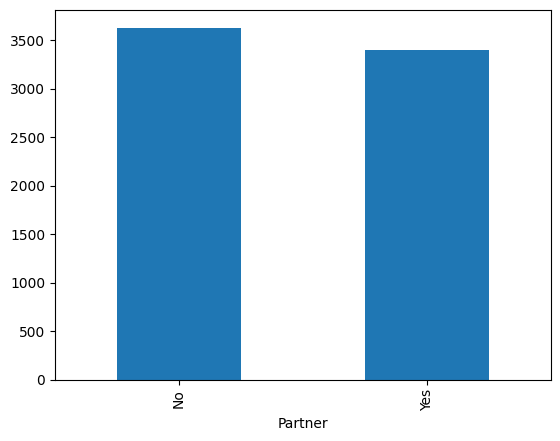

In [ ]:
# DataFrame value_counts()와 plot() 함수 활용
# 대상 컬럼 : 'Partner'
# plot 함수의 인자 : kind='bar'


df['Partner'].value_counts().plot(kind='bar')

####  
### 한꺼번에 Object 컬럼에 대해서 분포 Bar 차트 확인해 봅시다.

In [ ]:
# Object 컬럼만 뽑으려면
# 1. 일일히 눈으로 보고 Object 컬럼 고른다
# 2. select_dtype() 함수 활용한다.

df.select_dtypes('O').head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic)
1,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [ ]:
# Object 컬럼명만 뽑아보자
df.select_dtypes('O').columns.values

array(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'], dtype=object)

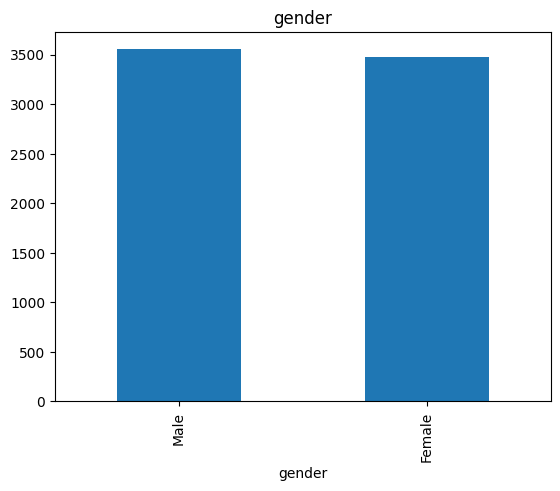

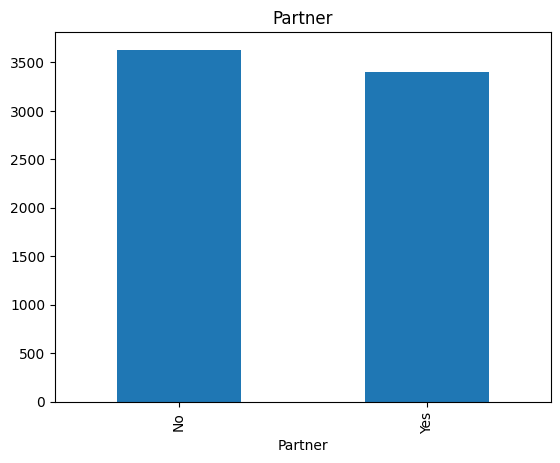

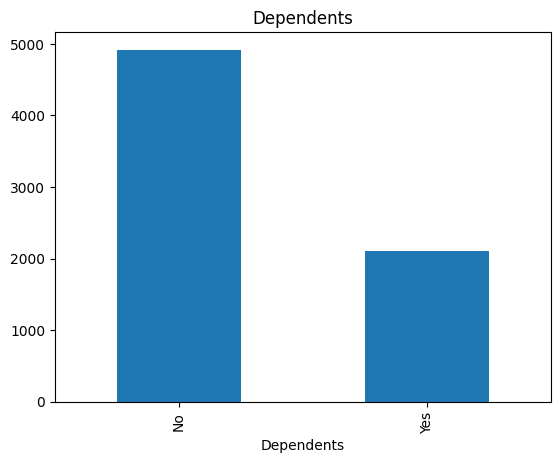

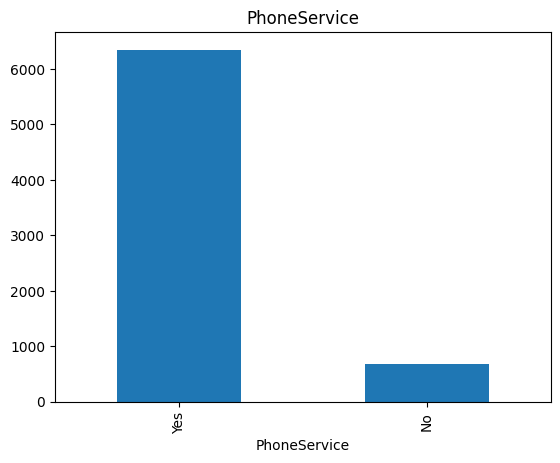

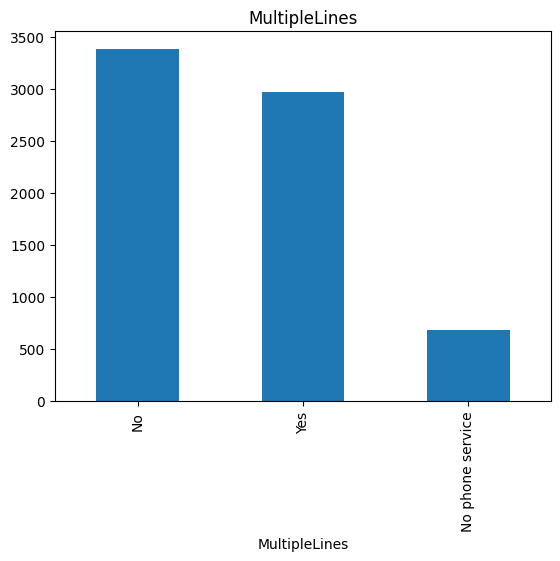

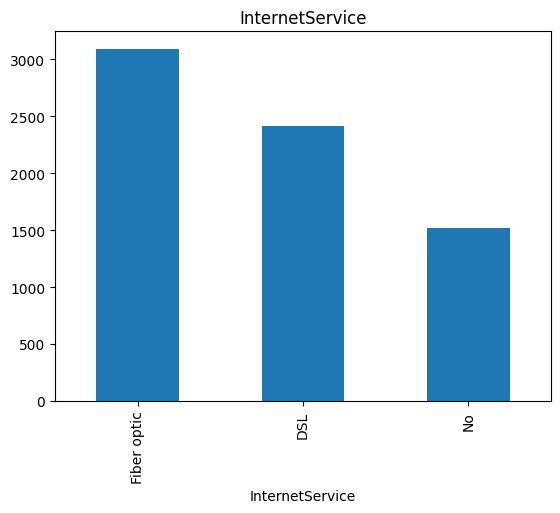

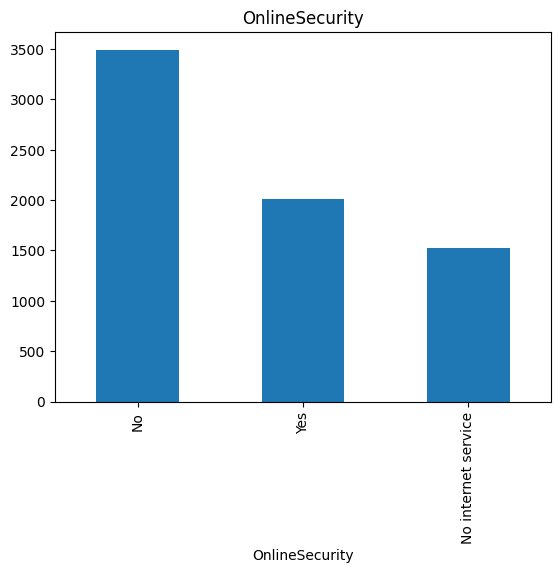

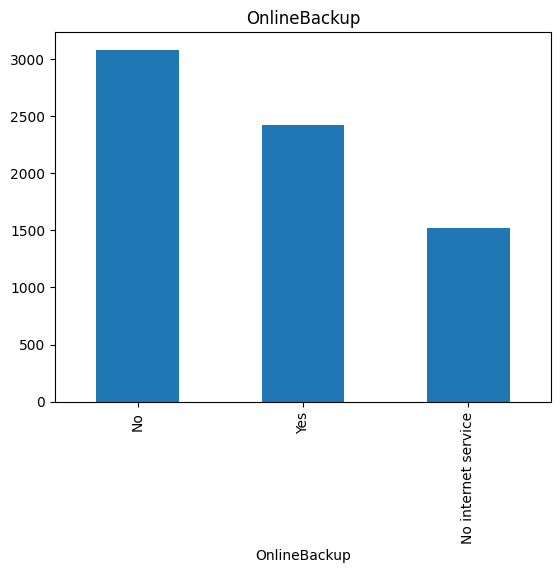

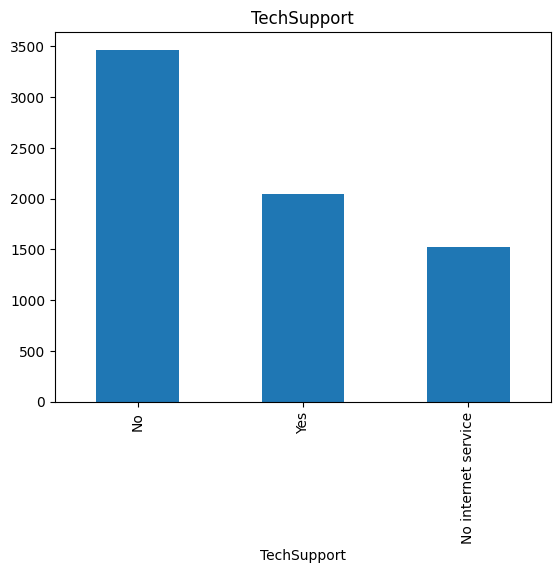

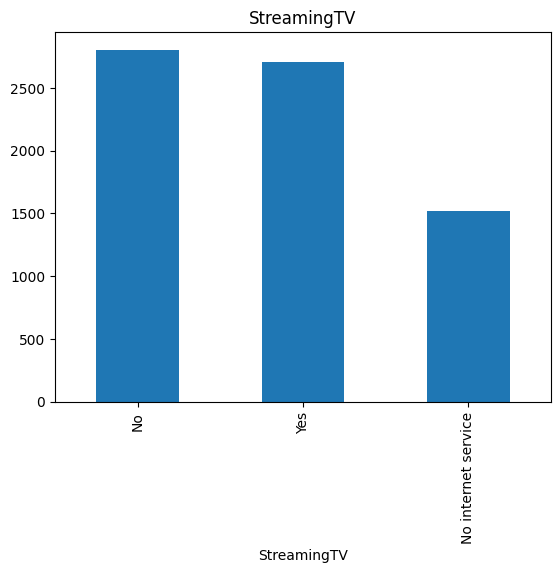

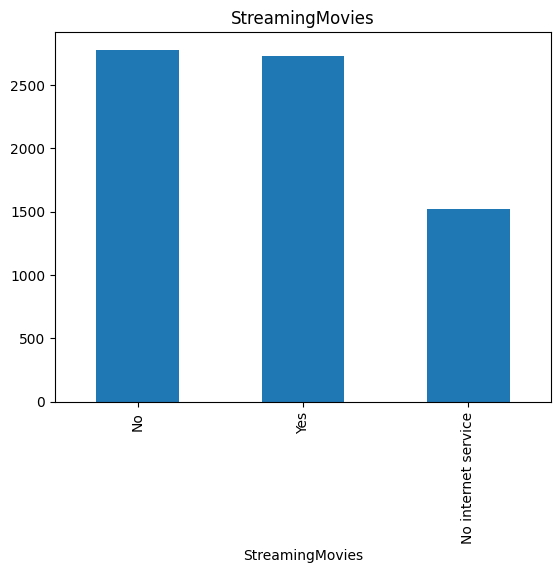

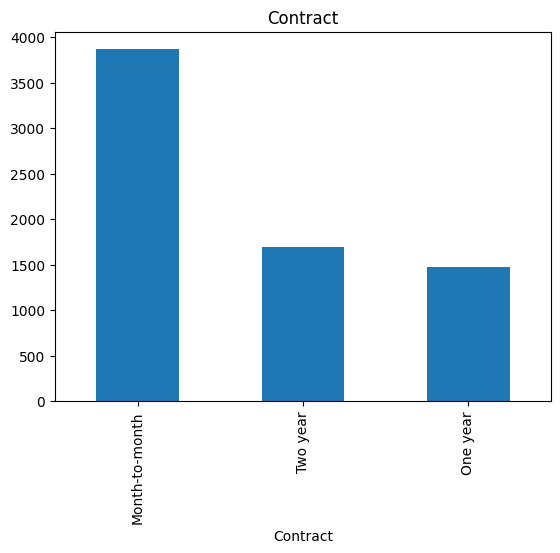

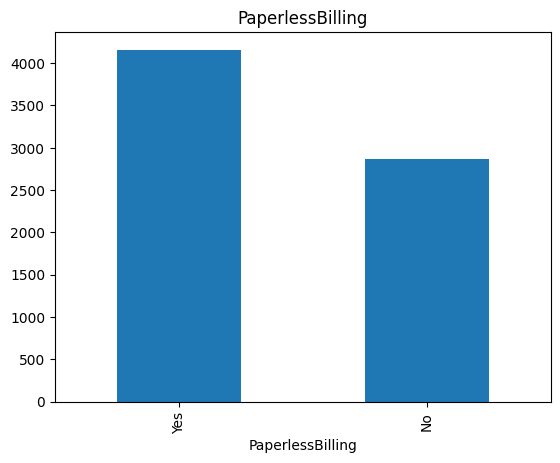

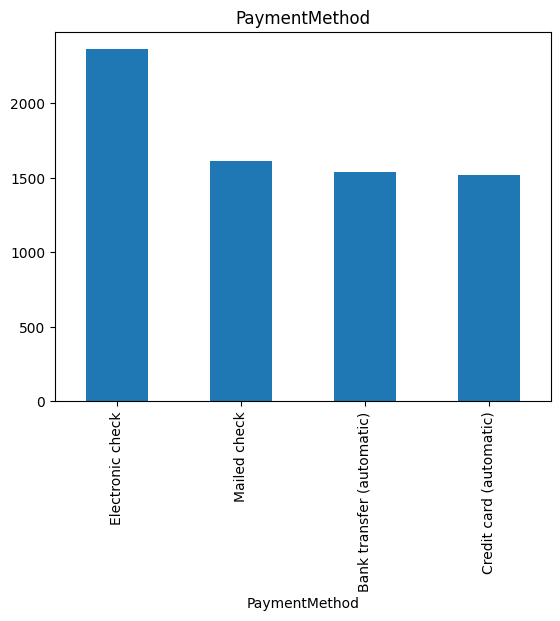

In [ ]:
# Object 컬럼 하나씩 가져와서 Bar 차트 그려보기
# 불균형 컬럼 : Dependents, PhoneService. 심한 불균형 가진 PhoneService 컬럼 삭제 필요

object_list = df.select_dtypes('object').columns.values

for col in object_list:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

#### 불균형 심한 PhoneService 컬럼 삭제

In [ ]:
df.drop('PhoneService', axis=1, inplace=True)

####  
### 숫자형 컬럼에 대한 시각화

In [ ]:
# number(int, float) 컬럼에 대해 검색
df.select_dtypes( 'number').head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0.0,69,105.10,7234.80,0
1,0.0,3,76.95,228.40,1
2,1.0,67,75.70,5060.85,0


#### Churn 컬럼

In [ ]:
# Churn 컬럼은 0, 1 되어 있으므로 분포 확인
df['Churn'].value_counts()

Churn
0    5162
1    1866
Name: count, dtype: int64

<Axes: xlabel='Churn'>

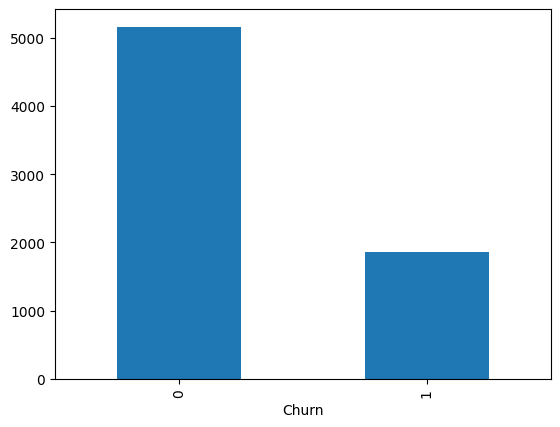

In [ ]:
# Churn 컬럼에 대한 Bar 차트 확인
# 이탈(1)가 이탈않음(0)에 비해 1/3 수준임 : 불균형

df['Churn'].value_counts().plot(kind='bar')

#### SeniorCitizen 컬럼

In [ ]:
# SeniorCitizen 컬럼은 0, 1 되어 있으므로 분포 확인
df['SeniorCitizen'].value_counts()

SeniorCitizen
0.0    5886
1.0    1142
Name: count, dtype: int64

<Axes: xlabel='SeniorCitizen'>

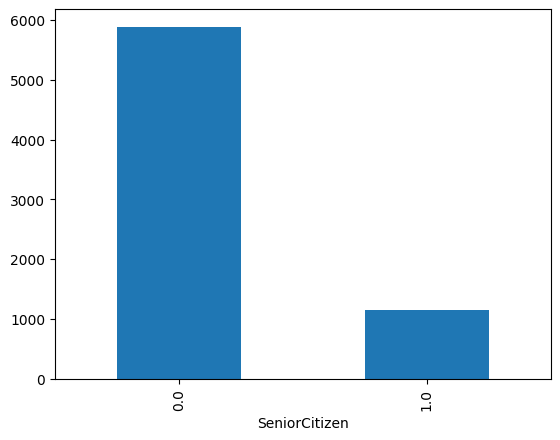

In [ ]:
# SeniorCitizen 컬럼에 대한 Bar 차트 확인
# 이탈(1)가 이탈않음(0)에 비해 1/5 수준임 : 불균형

df['SeniorCitizen'].value_counts().plot(kind='bar')

##### <font color=blue> **[문제] 불균형 심한 'SeniorCitizen' 컬럼을 삭제하세요.** </font>

In [ ]:
# DataFrame drop() 함수 활용
# 대상 컬럼 : 'SeniorCitizen'
# axis 와 inplace 옵션 사용


df.drop('SeniorCitizen', axis=1, inplace=True)

In [ ]:
# SeniorCitizen 삭제 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7028 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7028 non-null   object 
 1   Partner           7028 non-null   object 
 2   Dependents        7028 non-null   object 
 3   tenure            7028 non-null   int64  
 4   MultipleLines     7028 non-null   object 
 5   InternetService   7028 non-null   object 
 6   OnlineSecurity    7028 non-null   object 
 7   OnlineBackup      7028 non-null   object 
 8   TechSupport       7028 non-null   object 
 9   StreamingTV       7028 non-null   object 
 10  StreamingMovies   7028 non-null   object 
 11  Contract          7028 non-null   object 
 12  PaperlessBilling  7028 non-null   object 
 13  PaymentMethod     7028 non-null   object 
 14  MonthlyCharges    7028 non-null   float64
 15  TotalCharges      7028 non-null   float64
 16  Churn             7028 non-null   int64  
dtype

####  
### Histgram

In [ ]:
# seaborn 라이브러리 임포트
#!pip install seaborn

import seaborn as sns

#### tenure 컬럼

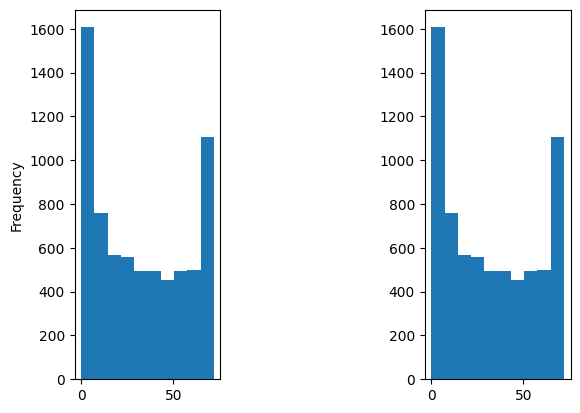

In [ ]:
# matplotlib 활용해서 tenure 컬럼의 히스토그램을 그려보자.

plt.subplot(131)
df['tenure'].plot(kind='hist') # 방법1

plt.subplot(133)
plt.hist(df['tenure']) # 방법2
plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

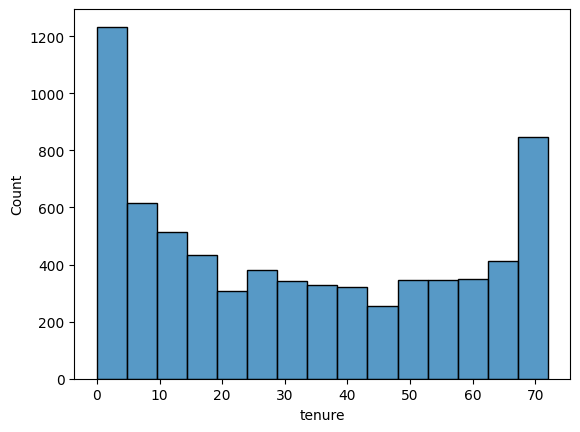

In [ ]:
# seaborn의 histplot 이용해서 tenure (서비스 사용기간)에 대한 히스토그램
# seaborn plot 옵션 대략 형태 : data=df, x='aaa', y='bbb', hue='ccc'
# 히스토그램 분석 : 처음에 많이 사용하고 , 70개월 사용하는 충성고객도 있다.

sns.histplot(data=df, x='tenure')

<Axes: xlabel='tenure', ylabel='Count'>

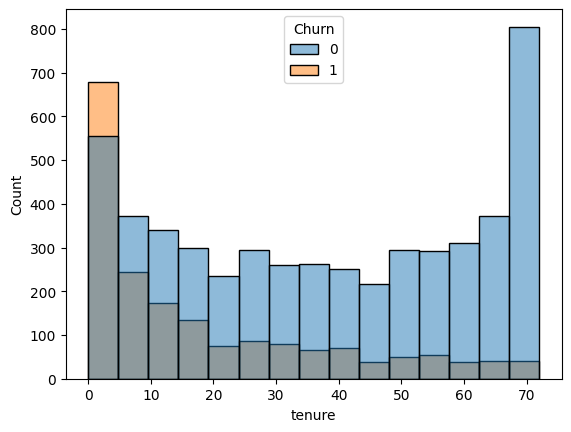

In [ ]:
# seaborn의 histplot 이용해서 tenure (서비스 사용기간) 대한 히스토그램을 Churn 으로 구분
# 히스토그램으로 Churn 구분하니 겹쳐서 보기 어렵다.

sns.histplot(data=df, x='tenure', hue='Churn')

<Axes: xlabel='tenure', ylabel='Density'>

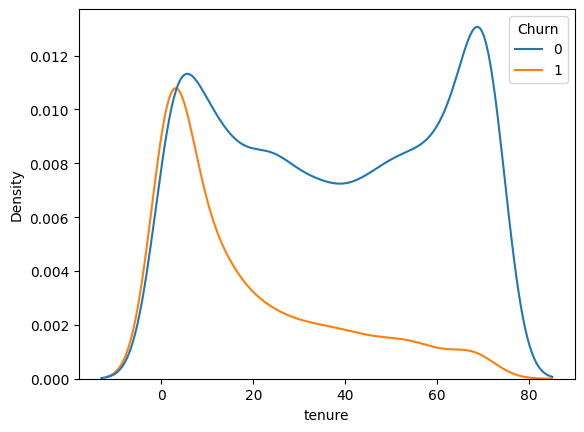

In [ ]:
# seaborn kdeplot : 히스토그램을 곡선으로 그려보자. (histplot 비슷)
# 분석 결과
# - Churn 0(No), 1(Yes , 이탈)
# - 처음엔 서비스 가입도 많이 하고 이탈도 많이 하는것으로 보이고
# - 70개월 이상 충성고객수는 점점 줄어 들고, 특히 60개월이상 넘어가면 이탈이 많이 줄어든다.

sns.kdeplot(data=df, x='tenure', hue='Churn')

#### TotalCharges 컬럼

<Axes: xlabel='TotalCharges', ylabel='Count'>

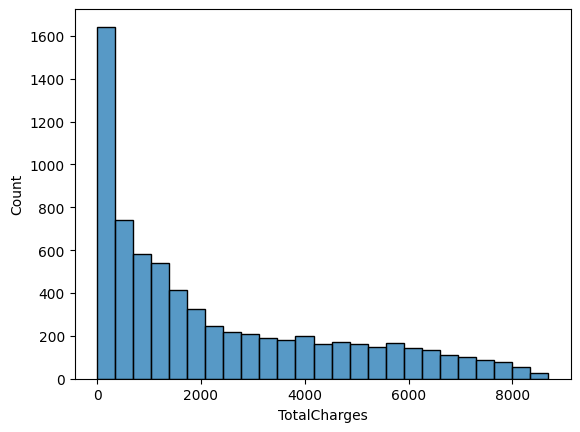

In [ ]:
# TotalCharges (서비스 총요금)에 대한 히스토그램
# 처음에 많이 사용하고 금액이 커질수록 사용자수가 줄어든다

sns.histplot(data=df, x='TotalCharges')

<Axes: xlabel='TotalCharges', ylabel='Density'>

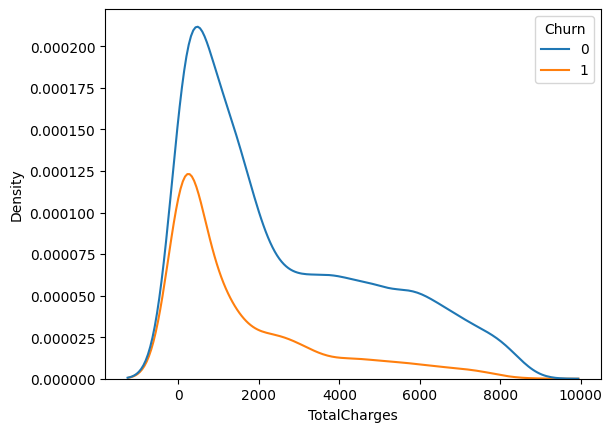

In [ ]:
# seaborn kdeplot 함수활용하여 TotalCharges 히스토그램을 곡선으로 그려보자.(hue='churn' 이용)
# 분석결과
# - 최근 가입자가 이탈하기 쉽다.
# - MonthlyCharges(서비스 총요금)이 클수록 이탈하기 쉽다.

sns.kdeplot(data=df, x='TotalCharges', hue='Churn')

####  
### Countplot

<Axes: xlabel='MultipleLines', ylabel='count'>

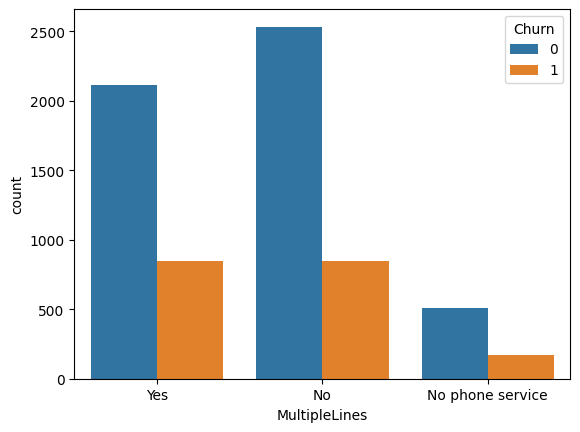

In [ ]:
# seaborn countplot 함수 이용해서 MultipleLines 서비스에 대한 갯수 분포 확인하기(hue='churn' 이용)
# 분석결과
# - MultipleLines 서비스를 사용하는 고객이 약간 더 높은 이탈율을 보인다.

sns.countplot(data=df, x='MultipleLines',  hue='Churn')

####  
### barplot

<Axes: xlabel='MultipleLines', ylabel='TotalCharges'>

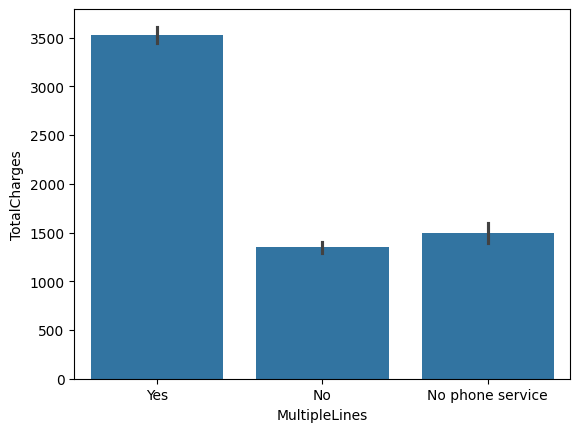

In [ ]:
# 추가 : 기존 실습에 없는 barplot
# seaborn barplot 함수 이용해서 'MultipleLines' 컬럼에 대해 bar 그려보자.
# x='MultipleLines', y='TotalCharges'

sns.barplot(data=df, x='MultipleLines', y='TotalCharges')

####  
### heatmap

In [ ]:
# 판다스 corr 함수 이용해서 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인해 보자
# 상관관계 결과를 corr 변수에 저장하고 내용 확인하자.

df[['tenure','MonthlyCharges','TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247618,0.826186
MonthlyCharges,0.247618,1.000000,0.651025
TotalCharges,0.826186,0.651025,1.000000


<Axes: >

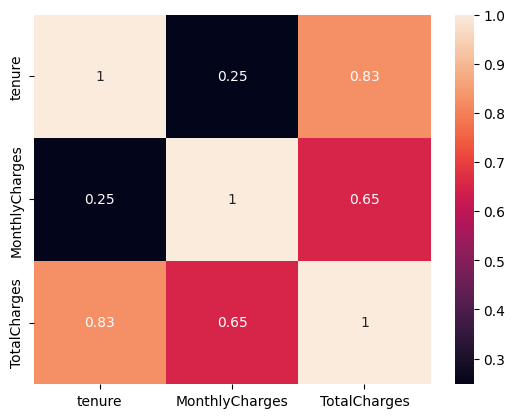

In [ ]:
# tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 seaborn heatmap으로 그려보자.(annot 추가)
# 분석결과 : tenure(서비스 사용기간)과 TotalCharges(서비스 총요금)간의 깊은 상관관계가 있어 보인다.

sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True)

####  
### boxplot

<Axes: xlabel='Churn', ylabel='TotalCharges'>

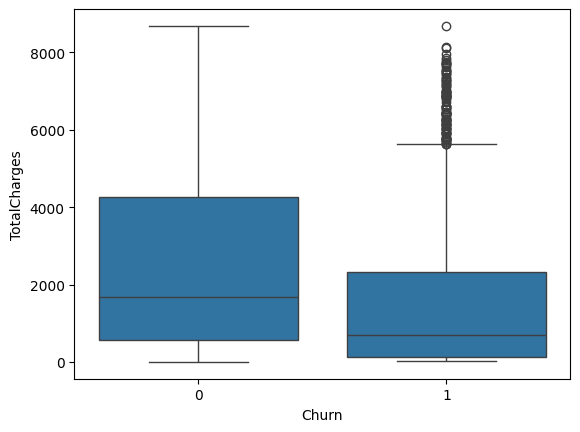

In [ ]:
# seaborn boxplot 이용하기(x='Churn', y='TotalCharges')
# 분석결과
# - 이탈하는 고객이 이탈하지 않는 고객에 비해 총사용금액이 낮으며, Outlier 보인다.

sns.boxplot(data=df, x='Churn', y='TotalCharges')

#  
# 5. 결과 저장하기

## 결과를 csv 파일로 저장하기

In [ ]:
# 판다스 to_csv 함수 이용해서 'data_v1_save.csv' 파일로 저장하기
# index=False 주어야 기존 인덱스 값이 저장되지 않음

df.to_csv('data_v1_save.csv', index=False)

In [ ]:
pd.read_csv('data_v1_save.csv').head()

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,Yes,69,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),105.10,7234.80,0
1,Male,No,No,3,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.95,228.40,1
2,Male,No,No,67,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.70,5060.85,0
3,Male,Yes,No,16,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.55,825.10,0
4,Male,Yes,No,43,No,DSL,No,No,No,Yes,No,One year,Yes,Mailed check,56.35,2391.15,0


<br>

##  
## 배운 내용 정리
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv(), pd.merge()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + 컬럼 type 변경하기 : df['col'].astype(int)
 + 결측지 처리 : df.replace(), df.fillna()
 + 그룹화 : df.groupby()
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot
5. 결과 저장하기
 + to_csv()